# **1. Preâmbulo**

O que veremos?

- Implementação de convoluções, base do capítulo de "Filtragem Espacial"

Recomendações:

- Caso já não tenha feito, assista os vídeos de nivelamento de Python disponíveis no Moodle
- Se já possui noção da linguagem, mas se considere sem prática, assista, em especial, os últimos vídeos do material em questão
- Lembre-se de **salvar** de tempos em tempos seu Notebook. Ao contrário da maioria das ferramentas da plataforma da Google, o Colab necessita de salvamento de tempos em tempos

## **1.1 Importações, path e função auxiliar**

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as sts
from time import time

In [3]:
os.chdir('/content/drive/MyDrive/2023 1/PDI/Notebooks-aulas/Filtragem Espacial/')

In [4]:
def gera_imagem(arr):
  return Image.fromarray(arr.round().clip(0,255).astype(np.uint8))

# **2. Implementação das Convoluções com Máscara e Vizinhança de Dimensões Ímpares**

## **2.1. Convolução bidimensional com máscara**

In [ ]:
def convolucao2d(img, mascara):
  # Aceita apenas máscara quadrada de dimensões ímpares
  assert mascara.shape[0] == mascara.shape[1] and mascara.shape[0] % 2 != 0 and mascara.shape[1] % 2 != 0

  arr = np.asarray(img).astype(int)
  # O resultado da convolução TEM QUE ser em uma cópia
  arrConv = arr.copy()

  ladoMascara = mascara.shape[1]

  esq = cima = dir = baixo = ladoMascara //2
  ref = [ladoMascara//2, ladoMascara//2]

  for i in range(arr.shape[0]):
    iinicio = max(0, i-cima)
    iparada = min(arr.shape[0], i+baixo+1)

    yinicio = ref[0] - (i-iinicio)
    yparada = ref[0] + (iparada-i)

    for j in range(arr.shape[1]):
      jinicio = max(0, j-esq)
      jparada = min(arr.shape[1], j+dir+1)

      xinicio = ref[1] - (j-jinicio)
      xparada = ref[1] + (jparada-j)

      fatia = arr[iinicio:iparada, jinicio:jparada]
      m = mascara[yinicio:yparada, xinicio:xparada]
      # Transforma de l x c para l x c x 1:
      m = np.expand_dims(m, axis=2)

      conv = (m *fatia).sum(axis=0).sum(axis=0)
      arrConv[i,j] = conv

  return gera_imagem(arrConv)

## **2.2. Convolução bidimensional não linear com vizinhança ímpar e função como parâmetro**

In [ ]:
def convolucao2d_nlin(img, funcao, tamanho=3):
  # Aceita apenas vizinhança de dimensões ímpares
  assert tamanho % 2 != 0

  arr = np.asarray(img).astype(int)
  arrConv = arr.copy()

  esq = cima = dir = baixo = tamanho //2

  for i in range(arr.shape[0]):
    iinicio = max(0, i-cima)
    iparada = min(arr.shape[0], i+baixo+1)

    for j in range(arr.shape[1]):
      jinicio = max(0, j-esq)
      jparada = min(arr.shape[1], j+dir+1)

      fatia = arr[iinicio:iparada, jinicio:jparada]

      conv = funcao(funcao(fatia, axis=0), axis=0)
      arrConv[i,j] = conv

  return gera_imagem(arrConv)

# **3. Testes**

## **3.1. Testes com máscara**

### **3.1.1. Detecção de bordas**

In [ ]:
M = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ]
)

img = Image.open('capivara_salto.png')
imgConv = convolucao2d(img, M)
imgConv2 = convolucao2d(img, M.T)
display(imgConv)
display(imgConv2)

arr = np.asarray(imgConv).astype(int)
arr2 = np.asarray(imgConv2).astype(int)
arrFinal = np.sqrt(arr**2 + arr2**2)
imgFinal = gera_imagem(arrFinal)
display(imgFinal)
arrFinal = arrFinal.dot(np.array([0.299, 0.587, 0.144]).T)
imgFinal = gera_imagem(arrFinal)
display(imgFinal)

In [ ]:
M = np.ones((3,3)) * (-1)
M[M.shape[0]//2, M.shape[1]//2] = M.shape[0]*M.shape[1]-1

print(M)

tempo = time()
imgConv = convolucao2d(img, M)
tempo = time() - tempo
print(tempo)
display(imgConv)

tempo = time()
arr = np.asarray(img).astype(int)
conv = []
for c in range(arr.shape[2]):
  conv.append(signal.convolve2d(arr[:,:,c], M, mode='same'))
conv = np.dstack(tuple(conv))
imgConv = gera_imagem(conv)
tempo = time() - tempo
print(tempo)
display(imgConv)

### **3.1.2. Realce Laplaciano**

In [ ]:
M = np.ones((3,3)) * (-1)
M[M.shape[0]//2, M.shape[1]//2] = M.shape[0]*M.shape[1]

print(M)

arr = np.asarray(img).astype(int)
conv = []
for c in range(arr.shape[2]):
  conv.append(signal.convolve2d(arr[:,:,c], M, mode='same'))
conv = np.dstack(tuple(conv))
imgConv = gera_imagem(conv)
display(imgConv)

### **3.1.3. Suavização**

In [ ]:
M = np.ones((3,3)) / 9

print(M)

arr = np.asarray(img).astype(int)
conv = []
for c in range(arr.shape[2]):
  conv.append(signal.convolve2d(arr[:,:,c], M, mode='same'))
conv = np.dstack(tuple(conv))
imgConv = gera_imagem(conv)
display(imgConv)

In [ ]:
M = np.ones((5,5)) / 25

print(M)

arr = np.asarray(img).astype(int)
conv = []
for c in range(arr.shape[2]):
  conv.append(signal.convolve2d(arr[:,:,c], M, mode='same'))
conv = np.dstack(tuple(conv))
imgConv = gera_imagem(conv)
display(imgConv)

### **3.1.4. Relevo**

In [ ]:
M = [
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
]
M = np.array(M)

print(M)

arr = np.asarray(img).astype(int)
conv = []
for c in range(arr.shape[2]):
  conv.append(signal.convolve2d(arr[:,:,c], M, mode='same'))
conv = np.dstack(tuple(conv))
imgConv = gera_imagem(conv)
display(imgConv)

In [ ]:
M = [
    [2, 1, 0],
    [1, 1, -1],
    [0, -1, -2]
]
M = np.array(M)

print(M)

arr = np.asarray(img).astype(int)
conv = []
for c in range(arr.shape[2]):
  conv.append(signal.convolve2d(arr[:,:,c], M, mode='same'))
conv = np.dstack(tuple(conv))
imgConv = gera_imagem(conv)
display(imgConv)

### **3.1.5. Detecção de bordas, com máscara de dimensões pares**

In [ ]:
M = np.array([[1,0], [0,-1]])
N = np.fliplr(M)

print(M)
print(N)

arr = np.asarray(img.convert('L')).astype(int)
conv = signal.convolve2d(arr, M, mode='same')
conv2 = signal.convolve2d(arr, N, mode='same')
conv = np.sqrt(conv**2 + conv2**2)
imgConv = gera_imagem(conv)
display(imgConv)

## **3.2. Testes com vizinhança e função passada como parâmetro**

### **3.2.1. Suavização**

In [ ]:
img = Image.open('ipe_amarelo.jpg')

In [ ]:
imgConv = convolucao2d_nlin(img, np.median, 3)
display(imgConv)

In [ ]:
imgConv = convolucao2d_nlin(img, np.median, 7)
display(imgConv)

### **3.2.2. Outros filtros não lineares**

#### **a. Filtros de máximo e mínimo**

In [ ]:
img = Image.open('folha.jpg')
imgConv = convolucao2d_nlin(img, np.max, 3)
display(img)
print()
display(imgConv)

In [ ]:
img = Image.open('ipe_amarelo.jpg')
imgConv = convolucao2d_nlin(img, np.min, 3)
display(img)
print()
display(imgConv)

#### **b. Usando funções personalizadas**

In [ ]:
def pto_medio(arr, axis=None):
  mx = np.max(arr, axis=axis)
  mn = np.min(arr, axis=axis)

  return (mx - mn) / 2

In [ ]:
img = Image.open('ipe_amarelo.jpg')
imgConv = convolucao2d_nlin(img, pto_medio, 3)
display(imgConv)
print()

# Alargamento de contraste para melhor visualização
arrConv = np.asarray(imgConv).astype(int)
mx = arrConv.max(axis=0).max(axis=0)
mn = arrConv.min(axis=0).min(axis=0)
arrNorm = (arrConv - mn) / (mx - mn)
arrConv = arrNorm * 255
imgConv = gera_imagem(arrConv)
display(imgConv)
print()

In [ ]:
def aleatorio(arr, axis=None):
  if axis is None:
    axis = 0
  return arr[np.random.choice(arr.shape[axis])]

In [ ]:
img = Image.open('folha.jpg')
imgConv = convolucao2d_nlin(img, aleatorio, 7)
display(imgConv)

In [ ]:
k = 4
img = Image.open('capivara_salto.png')

M = -1 * np.ones((3,3)) / 9
M[M.shape[0]//2, M.shape[1]//2] += 1
M *= k
M[M.shape[0]//2, M.shape[1]//2] += 1

print(M)

imgConv = convolucao2d(img, M)
display(img)
display(imgConv)

In [1]:
def kernel_gauss(tam=5, sigma=1):
  x = np.linspace(-sigma, sigma, tam+1)
  kern1d = np.diff(sts.norm.cdf(x))
  kern2d = np.outer(kern1d, kern1d)
  return kern2d/kern2d.sum()

Kernel gaussiano:
[[0.02867168 0.03633314 0.0393175  0.03633314 0.02867168]
 [0.03633314 0.04604185 0.04982366 0.04604185 0.03633314]
 [0.0393175  0.04982366 0.0539161  0.04982366 0.0393175 ]
 [0.03633314 0.04604185 0.04982366 0.04604185 0.03633314]
 [0.02867168 0.03633314 0.0393175  0.03633314 0.02867168]]

Imagem original:


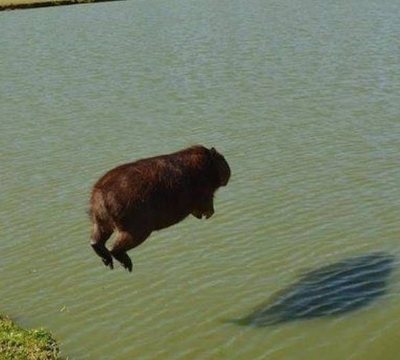


Imagem suavizada


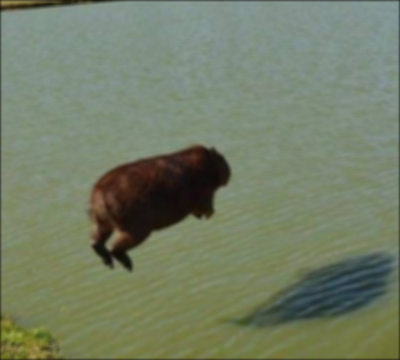

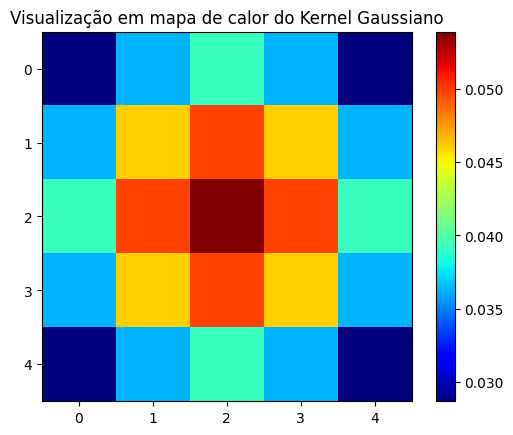

In [8]:
img = Image.open('capivara_salto.png')
arr = np.asarray(img).astype(int)
K = kernel_gauss()

print('Kernel gaussiano:')
print(K)
print()

conv = []
for c in range(arr.shape[-1]):
  conv.append(signal.convolve2d(arr[:,:,c], K, mode='same'))
conv = np.dstack(tuple(conv))
imgConv = gera_imagem(conv)

print('Imagem original:')
display(img)
print()
print('Imagem suavizada')
display(imgConv)
print()

plt.title('Visualização em mapa de calor do Kernel Gaussiano')
plt.imshow(K, cmap='jet')
plt.colorbar()
plt.show()